# Regularisation Lasso

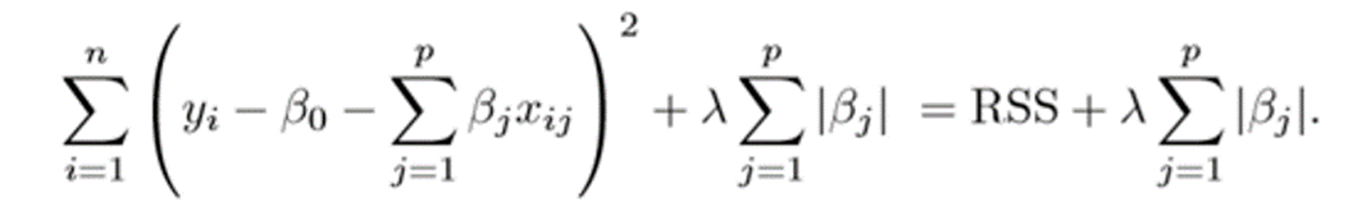

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import os
os.chdir('C:/Users/DELL/Desktop/DS_Course/Data_Analytics/DataSets')

In [3]:
import pandas as pd
df = pd.read_csv('Cars93.csv')
df

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,89,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17,21,None,...,7,187,115,72,38,34.0,NaN,3960,non-USA,Volkswagen Eurovan
89,90,Volkswagen,Passat,Compact,17.6,20.0,22.4,21,30,None,...,5,180,103,67,35,31.5,14.0,2985,non-USA,Volkswagen Passat
90,91,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18,25,None,...,4,159,97,66,36,26.0,15.0,2810,non-USA,Volkswagen Corrado
91,92,Volvo,240,Compact,21.8,22.7,23.5,21,28,Driver only,...,5,190,104,67,37,29.5,14.0,2985,non-USA,Volvo 240


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             89 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

In [5]:
s=df.isna().sum()
s[s>0]

AirBags            4
Rear.seat.room     2
Luggage.room      11
dtype: int64

# Separate X and Y

In [6]:
X = df.drop(labels=['id','Weight'],axis=1)
Y = df[['Weight']]

In [7]:
X.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,13.2,5,177,102,68,37,26.5,11.0,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,18.0,5,195,115,71,38,30.0,15.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,16.9,5,180,102,67,37,28.0,14.0,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,21.1,6,193,106,70,37,31.0,17.0,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,21.1,4,186,109,69,39,27.0,13.0,non-USA,BMW 535i


In [8]:
Y.head()

,Weight
0,2705
1,3560
2,3375
3,3405
4,3640


# Seperate Cat and con features from X

In [9]:
from PM8 import catconsep
cat,con = catconsep(X)

In [10]:
cat

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin',
 'Make']

In [11]:
con

['Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room']

# Build sklearn pipeline for preprocessing

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [13]:
#num_pipeline
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),
                          ('scaler',StandardScaler())])

#cat_pipeline
cat_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                           ('ohe',OneHotEncoder(handle_unknown='ignore'))])

#combine pipelines with column transformer
pre = ColumnTransformer([('num',num_pipe,con),
                        ('cat',cat_pipe,cat)])

In [14]:
X_pre = pre.fit_transform(X).toarray()
X_pre

array([[-0.48578741, -0.37572014, -0.28246529, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.38801699,  1.49784409,  1.53140881, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.00865782,  0.99822696,  0.94805231, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.66378585,  0.39452293,  0.16416702, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.53733279,  0.33207079,  0.14593713, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.88220476,  0.7484184 ,  0.60168439, ...,  0.        ,
         0.        ,  1.        ]])

In [15]:
cols = pre.get_feature_names_out()
cols

array(['num__Min.Price', 'num__Price', 'num__Max.Price', 'num__MPG.city',
       'num__MPG.highway', 'num__EngineSize', 'num__Horsepower',
       'num__RPM', 'num__Rev.per.mile', 'num__Fuel.tank.capacity',
       'num__Passengers', 'num__Length', 'num__Wheelbase', 'num__Width',
       'num__Turn.circle', 'num__Rear.seat.room', 'num__Luggage.room',
       'cat__Manufacturer_Acura', 'cat__Manufacturer_Audi',
       'cat__Manufacturer_BMW', 'cat__Manufacturer_Buick',
       'cat__Manufacturer_Cadillac', 'cat__Manufacturer_Chevrolet',
       'cat__Manufacturer_Chrylser', 'cat__Manufacturer_Chrysler',
       'cat__Manufacturer_Dodge', 'cat__Manufacturer_Eagle',
       'cat__Manufacturer_Ford', 'cat__Manufacturer_Geo',
       'cat__Manufacturer_Honda', 'cat__Manufacturer_Hyundai',
       'cat__Manufacturer_Infiniti', 'cat__Manufacturer_Lexus',
       'cat__Manufacturer_Lincoln', 'cat__Manufacturer_Mazda',
       'cat__Manufacturer_Mercedes-Benz', 'cat__Manufacturer_Mercury',
       'cat__Man

In [16]:
X_pre = pd.DataFrame(X_pre,columns=cols)
X_pre.head()

,num__Min.Price,num__Price,num__Max.Price,num__MPG.city,num__MPG.highway,num__EngineSize,num__Horsepower,num__RPM,num__Rev.per.mile,num__Fuel.tank.capacity,...,cat__Make_Toyota Camry,cat__Make_Toyota Celica,cat__Make_Toyota Previa,cat__Make_Toyota Tercel,cat__Make_Volkswagen Corrado,cat__Make_Volkswagen Eurovan,cat__Make_Volkswagen Fox,cat__Make_Volkswagen Passat,cat__Make_Volvo 240,cat__Make_Volvo 850
0,-0.485787,-0.375720,-0.282465,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.388017,1.497844,1.531409,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.008658,0.998227,0.948052,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.755752,1.091905,1.303535,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Train test split

In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,test_size=0.2,random_state=10)

In [18]:
xtrain.shape

(74, 257)

In [19]:
xtest.shape

(19, 257)

# Build base model i.e. Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [21]:
# Check performance on training
model.score(xtrain,ytrain)

1.0

In [22]:
# Check performance on testing
model.score(xtest,ytest)

0.8353296233710379

In [23]:
from PM8 import evaluate_model
evaluate_model(xtrain,ytrain,xtest,ytest,model)

Training Scores :
MSE :  2.2076779862057157e-24
RMSE:  1.4858256917302633e-12
MAE :  1.1184326738018443e-12
R2  :  1.0


Testing Scores :
MSE :  38258.675988817944
RMSE:  195.59825149734326
MAE :  148.19191682104812
R2  :  0.8353296233710379


#Try to make above scores in equal format

# Building a lasso model

In [24]:
from sklearn.linear_model import Lasso
model1 = Lasso(alpha=3)
model1.fit(xtrain,ytrain)

Lasso(alpha=3)

In [25]:
model1.score(xtrain,ytrain)

0.9788112523152114

In [26]:
model1.score(xtest,ytest)

0.8227445561261861

# Create different alpha values

In [27]:
import numpy as np
alphas = np.arange(0.1,100,0.1)   # 100 is taken becaus graph is intersecting for 100 ..we can got for any other values

In [28]:
alphas

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11. ,
       11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. , 12.1,
       12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1, 13.2,
       13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2, 14.3,
       14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15

In [29]:
from sklearn.metrics import mean_squared_error
tr = []
ts = []
for i in alphas:
    model2 = Lasso(alpha=i)
    model2.fit(xtrain,ytrain)
    ypred_tr = model2.predict(xtrain)
    ypred_ts = model2.predict(xtest)
    tr_mse = mean_squared_error(ytrain,ypred_tr)
    ts_mse = mean_squared_error(ytest,ypred_ts)
    tr.append(tr_mse)
    ts.append(ts_mse)

In [30]:
print(tr)

[36.14631102994785, 135.5522650326894, 295.7795849028114, 505.6963174559162, 761.2495517333984, 1047.6719162068825, 1356.2937264953764, 1685.1179118998093, 2035.706675698134, 2367.07261662892, 2723.327967748218, 3083.0551195922153, 3416.7451617974366, 3772.22379545123, 4120.4896387997605, 4460.730527750178, 4788.173396231777, 5095.574822020487, 5378.389359476854, 5658.130644745453, 5925.449679447684, 6205.567569409192, 6487.992451531724, 6724.5044655543725, 6950.679085769197, 7145.2836280628735, 7337.14335532494, 7525.989018699447, 7701.06236942748, 7880.413714289618, 8053.220722021009, 8206.811592275773, 8355.761288972635, 8509.846516799098, 8643.210012804753, 8771.187755488378, 8901.714636421126, 9025.719293946977, 9151.463934596019, 9280.589167021551, 9413.059830332006, 9548.129436415798, 9685.621874955343, 9825.703764774402, 9963.774903696147, 10073.435572368819, 10157.824723456177, 10244.843395927206, 10333.80936626118, 10424.676420414069, 10517.402061728317, 10611.980406887025, 1

In [31]:
print(ts)

[45974.9814549656, 44843.60388403401, 46191.54911128508, 47107.54692291909, 48372.43205605948, 48647.029220216275, 49084.89489613877, 49680.13869996456, 50387.07761853282, 50734.87136696717, 50732.14899505197, 49894.33359897453, 49605.87563498861, 49176.55784464573, 48554.34711267928, 47624.115778355575, 46848.24970660795, 46314.40733573449, 46056.34441368763, 45802.56789821499, 45413.53295359384, 45014.00610058489, 44566.65989794269, 44045.06269207369, 43530.613593166156, 43019.68628313233, 42538.773634449586, 42084.37009964357, 41663.79416177891, 41182.62636699169, 40605.01676738839, 39978.687324999344, 39362.2940440706, 38765.29039913274, 38151.28504523701, 37531.405071538444, 36905.76090464933, 36308.22349088796, 35731.88898140766, 35170.101402149165, 34621.35664590532, 34075.2843101751, 33499.9524394268, 32934.24429323221, 32390.78687544098, 31963.883937548013, 31679.924360726913, 31402.48363092079, 31128.492038300796, 30858.527128059526, 30592.464677280415, 30329.465807082284, 30

# Visualize training and testing errors

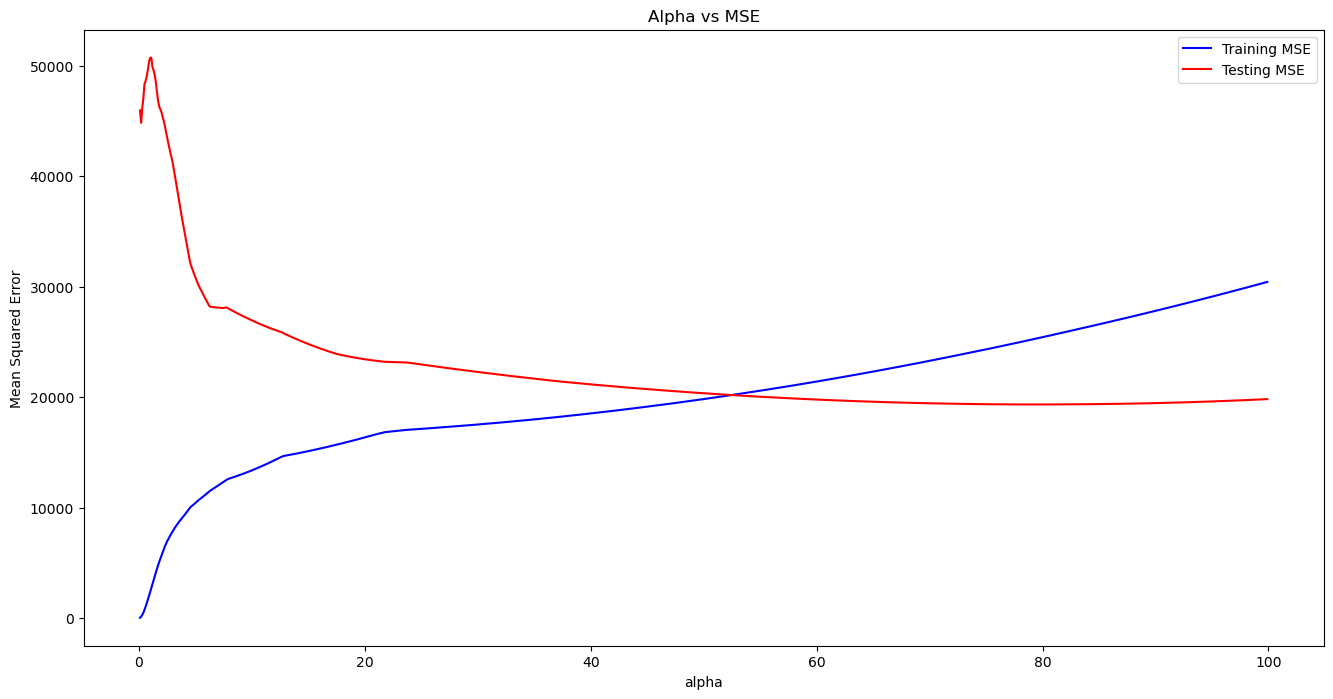

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(alphas,tr,c='blue',label='Training MSE')
plt.plot(alphas,ts,c='red',label='Testing MSE')
plt.xlabel('alpha')
plt.ylabel('Mean Squared Error')
plt.title('Alpha vs MSE')
plt.legend()
plt.show()

In [33]:
from sklearn.metrics import mean_squared_error
tr = []
ts = []
for i in alphas:
    model2 = Lasso(alpha=i)
    model2.fit(xtrain,ytrain)
    ypred_tr = model2.predict(xtrain)
    ypred_ts = model2.predict(xtest)
    tr_mse = mean_squared_error(ytrain,ypred_tr)
    ts_mse = mean_squared_error(ytest,ypred_ts)
    tr.append(tr_mse)
    ts.append(ts_mse)
    if tr_mse>=ts_mse:
        opt_alpha = i
        print(f'Optimum value of alpha is {opt_alpha}')
        break

Optimum value of alpha is 52.50000000000001


In [34]:
opt_alpha

52.50000000000001

# Build a final model with alpha=52.5

In [35]:
model3 = Lasso(alpha=opt_alpha)
model3.fit(xtrain,ytrain)

Lasso(alpha=52.50000000000001)

In [36]:
# Check training r2
model3.score(xtrain,ytrain)

0.9456867452549849

In [37]:
# Check testing r2
model3.score(xtest,ytest)

0.9130868670370244

In [38]:
evaluate_model(xtrain,ytrain,xtest,ytest,model3)

Training Scores :
MSE :  20199.91572543912
RMSE:  142.12640755833914
MAE :  110.20646190690468
R2  :  0.9456867452549849


Testing Scores :
MSE :  20192.954320471916
RMSE:  142.1019152596893
MAE :  108.26321434880234
R2  :  0.9130868670370244


# Predictions

In [39]:
ypred_tr = model3.predict(xtrain)

In [40]:
ypred_tr[0:5]

array([3084.86510355, 2536.66686822, 3308.05576551, 3512.64813447,
       3052.58653762])

In [41]:
ytrain.head()

,Weight
42,3040
53,2440
21,3570
6,3470
26,3080


In [42]:
ypred_ts = model3.predict(xtest)

In [43]:
ypred_ts[0:5]

array([2949.92813164, 3029.40349748, 3429.92336563, 3935.85634734,
       3527.19777605])

In [44]:
ytest

,Weight
34,2710
90,2810
3,3405
35,3735
19,3515
66,3200
63,2545
41,2350
44,2620
71,2640
